<a href="https://colab.research.google.com/github/amann-03/PyTorch_Implementations/blob/main/TrexQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dc1e29f41ea12ba3af68346577de0c2a68378c4351591915679adae9ed71004f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/TQ_Train_Kaggle.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df_train.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df_train.columns))

# Extract feature columns: columns that are prefixed with 'f'
feature_prefix = 'f'
feats = [col for col in df_train.columns if col.startswith(feature_prefix)]

# Display the number of feature columns and their names
print("\nNumber of feature columns:", len(feats))
print("\nFeature columns:\n", feats)

Shape of the training dataset: (105442, 89)

Columns in the training dataset:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'target']

Number of feature columns: 87

Feature columns:
 ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37',

In [ ]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile

In [8]:
profile

In [9]:
profile.to_file("trexReport.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
X = df_train.drop('target', axis=1)  # Features
y = df_train['target']  # Target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Generate correlation of each feature with target variable

In [10]:
target_correlation = df_train.corr()['target'].sort_values(ascending=False)

# Display the top correlations with the target
print("Top features correlated with the target variable:")
print(target_correlation.head(10))

print("\nBottom features correlated with the target variable:")
print(target_correlation.tail(10))

Top features correlated with the target variable:
target                   1.00
f3                       0.04
f59                      0.02
f13                      0.02
f16                      0.01
f24                      0.01
f56                      0.01
f53                      0.01
f34                      0.01
f15                      0.01
Name: target, dtype: float64

Bottom features correlated with the target variable:
f71                  -0.01
f2                   -0.01
f38                  -0.02
f87                  -0.02
f66                  -0.02
f27                  -0.02
f26                  -0.02
f18                  -0.02
f1                   -0.03
f41                  -0.03
Name: target, dtype: float64


Generate a correlation matrix

In [12]:
# Generate the full correlation matrix
correlation_matrix = df_train.corr()

# Display the correlation matrix
correlation_matrix

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
row_id,1.00,0.00,0.01,0.00,-0.06,0.02,-0.01,0.02,0.00,0.01,-0.01,0.01,0.01,-0.02,-0.02,-0.01,0.08,-0.01,0.11,0.01,0.02,-0.01,0.01,-0.04,0.13,-0.07,0.05,0.00,0.08,-0.01,-0.02,0.01,-0.04,-0.04,-0.05,0.06,0.03,-0.00,0.03,-0.00,0.11,0.00,-0.06,-0.03,0.01,0.02,-0.01,0.00,-0.02,0.00,0.08,0.07,-0.00,-0.02,-0.01,0.03,-0.03,-0.00,-0.02,0.00,-0.00,-0.03,-0.01,-0.00,-0.00,0.01,-0.00,-0.01,0.17,0.03,0.07,0.10,-0.01,0.22,-0.03,-0.03,0.02,-0.01,0.01,-0.00,0.01,-0.02,0.03,0.00,0.02,-0.08,-0.09,-0.07,-0.00
f1,0.00,1.00,-0.01,0.00,0.01,0.01,0.31,0.03,0.10,0.01,0.01,0.00,0.01,-0.02,0.01,-0.00,-0.01,0.02,0.55,0.00,0.00,0.00,-0.01,-0.03,-0.00,0.08,0.21,0.13,0.00,0.24,-0.00,-0.00,0.00,0.00,-0.00,0.02,-0.01,-0.01,0.01,0.01,0.02,-0.01,0.00,-0.00,0.03,-0.01,-0.00,-0.00,-0.02,0.00,0.00,-0.01,-0.14,0.01,0.01,-0.00,0.02,0.00,-0.03,0.01,0.00,0.01,-0.01,0.01,0.00,0.01,0.00,-0.00,0.00,-0.01,0.01,-0.01,-0.03,0.01,0.01,-0.00,-0.02,0.02,-0.02,0.02,0.03,0.01,-0.00,-0.01,-0.01,0.02,-0.01,0.02,-0.03
f2,0.01,-0.01,1.00,-0.00,0.00,0.00,-0.01,0.06,0.07,0.00,0.03,0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.46,-0.02,0.03,0.01,-0.00,0.02,-0.01,0.01,-0.00,0.03,0.11,0.00,0.02,-0.02,0.00,-0.00,0.00,-0.00,0.03,-0.01,0.03,-0.01,-0.01,0.01,0.04,0.00,-0.00,0.02,0.02,0.01,0.01,-0.01,0.01,0.02,0.04,-0.04,0.02,0.01,-0.01,0.00,-0.00,-0.05,0.00,0.01,0.01,0.03,-0.02,0.01,0.01,0.00,-0.00,0.02,-0.02,0.01,-0.02,-0.05,0.02,0.01,0.00,-0.02,0.02,-0.02,0.02,0.03,-0.00,-0.01,-0.00,0.00,0.01,-0.01,0.02,-0.01
f3,0.00,0.00,-0.00,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.04,-0.00,-0.01,0.01,0.01,-0.03,-0.00,-0.01,-0.00,-0.02,-0.04,-0.00,-0.01,0.00,0.01,0.01,0.01,-0.00,-0.00,-0.00,0.01,-0.00,0.01,0.00,0.01,0.01,0.01,-0.00,-0.01,0.01,0.00,0.01,-0.03,0.01,-0.01,-0.01,-0.00,0.01,0.02,0.03,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,0.01,0.02,0.03,-0.00,0.01,-0.00,0.02,0.01,0.00,-0.00,0.00,0.01,-0.00,-0.02,0.00,-0.01,0.01,-0.00,0.02,0.02,-0.01,-0.00,-0.01,-0.00,-0.00,0.01,-0.01,0.01,-0.03,0.00,-0.00,-0.01,0.04
f4,-0.06,0.01,0.00,0.01,1.00,-0.03,0.01,-0.00,0.00,-0.00,0.00,-0.01,-0.03,-0.01,0.03,0.01,-0.00,-0.01,-0.02,-0.01,0.01,0.00,0.00,0.06,-0.11,0.31,0.09,0.01,-0.10,0.00,-0.04,-0.01,0.08,0.26,0.04,-0.01,-0.02,-0.01,0.01,-0.00,-0.07,0.04,0.19,-0.01,0.01,0.00,0.02,0.01,0.02,0.06,-0.09,-0.03,0.00,-0.00,-0.00,0.00,0.11,-0.00,0.01,-0.00,-0.01,0.04,0.03,0.00,0.01,0.00,-0.01,-0.01,-0.05,-0.01,-0.02,-0.02,-0.00,-0.28,0.12,0.10,-0.01,-0.00,0.01,-0.00,-0.00,0.20,-0.00,-0.02,-0.01,-0.01,0.17,-0.01,-0.00
f5,0.02,0.01,0.00,-0.01,-0.03,1.00,-0.00,0.00,0.00,0.01,0.01,0.01,-0.03,-0.01,-0.00,0.00,0.02,0.00,0.03,-0.00,-0.01,-0.00,0.00,-0.00,0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.04,0.02,0.02,-0.00,0.07,-0.01,0.00,0.00,-0.03,0.00,0.01,0.02,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,0.02,0.01,-0.00,-0.00,0.00,0.00,-0.03,-0.00,-0.05,-0.00,0.00,0.01,-0.02,0.12,-0.01,-0.00,-0.01,-0.01,0.06,0.01,0.06,0.03,0.02,0.01,-0.02,-0.02,-0.01,0.01,-0.02,0.01,0.01,-0.04,0.02,0.00,0.01,-0.02,0.03,-0.03,-0.01
f6,-0.01,0.31,-0.01,0.00,0.01,-0.00,1.00,0.01,0.12,-0.02,0.00,-0.03,0.03,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.04,0.04,0.03,-0.04,-0.08,-0.01,0.03,0.02,0.01,-0.00,0.13,-0.00,-0.01,0.01,0.01,0.01,0.02,-0.01,-0.04,-0.01,0.03,0.01,0.06,0.01,-0.01,0.08,0.01,0.04,0.00,-0.01,-0.03,-0.02,-0.00,-0.04,0.00,-0.01,0.00,0.02,0.00,-0.02,0.00,0.00,0.03,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.04,0.01,-0.02,-0.04,-0.04,0.01,0.11,0.10,-0.01,0.06,-0.02,0.07,0.02,0.03,-0.00,0.00,-0.03,0.04,0.01,0.01,-0.00
f7,0.02,0.03,0.06,-0.01,-0.00,0.00,0.01,1.00,0.01,-0.00,0.02,-0.01,0.00,0.03,-0.04,-0.01,0.05,-0.03,0.02,0.02,0.04,-0.02,-0.02,0.01,0.01,-0.00,0.02,0.02,0.03,0.01,-0.03,0.02,0.01,-0.02,0.00,0.00,-0.00,0.27,0.03,0.02,0

Visualize the correlation matrix using heatmap to identify the highly correlated features visually.

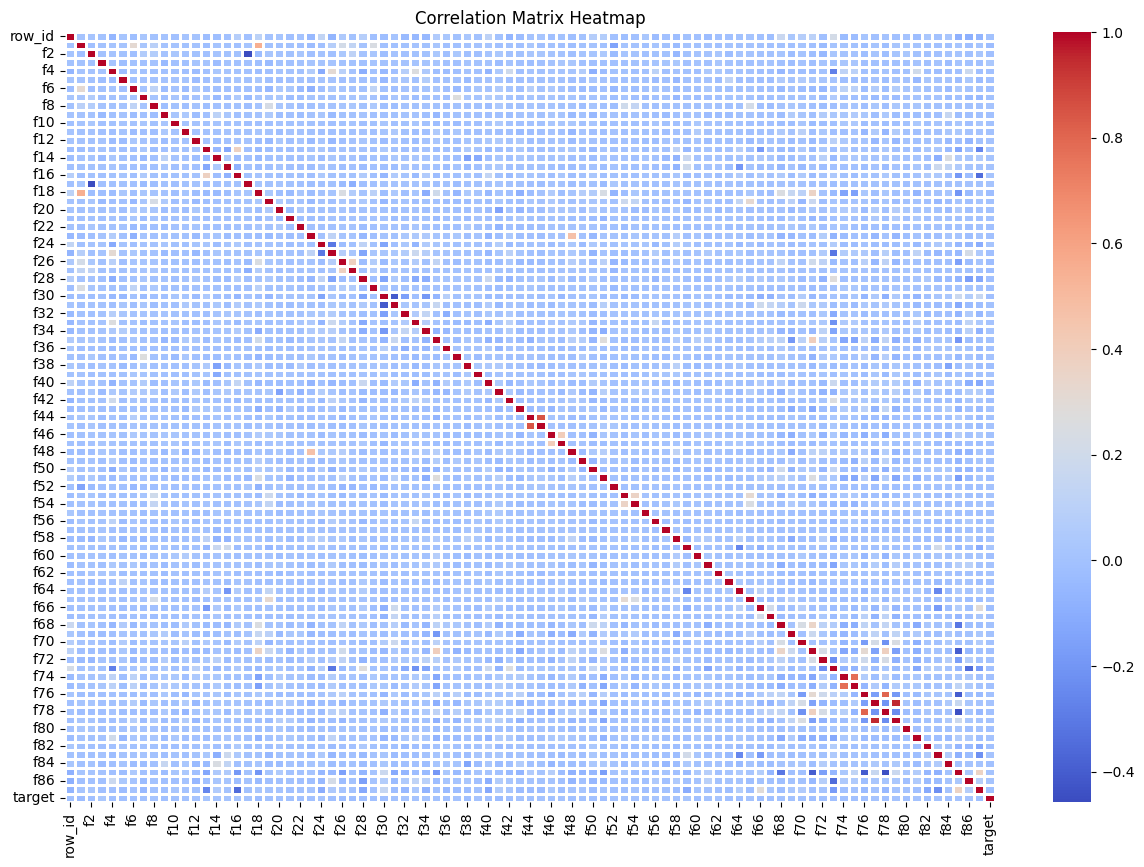

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=1)

plt.title('Correlation Matrix Heatmap')
plt.show()

Identifying the highly correlated features

In [16]:
# Find pairs of highly correlated features
highly_correlated_pairs = []

threshold = 0.6  # Define a threshold for "high" correlation

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
print("Highly correlated feature pairs (threshold > 0.6):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (threshold > 0.6):
f45 and f44: correlation = 0.85
f75 and f74: correlation = 0.77
f78 and f76: correlation = 0.80
f79 and f77: correlation = 0.95


                     row_id                   f1                   f2                   f3                   f4                   f5                   f6                   f7                   f8                   f9                  f10                  f11                  f12                  f13                  f14                  f15                  f16                  f17                  f18                  f19                  f20                  f21                  f22                  f23                  f24                  f25                  f26                  f27                  f28                  f29                  f30                  f31                  f32                  f33                  f34                  f35                  f36                  f37                  f38                  f39                  f40                  f41                  f42                  f43                  f44                  f45                  f46       

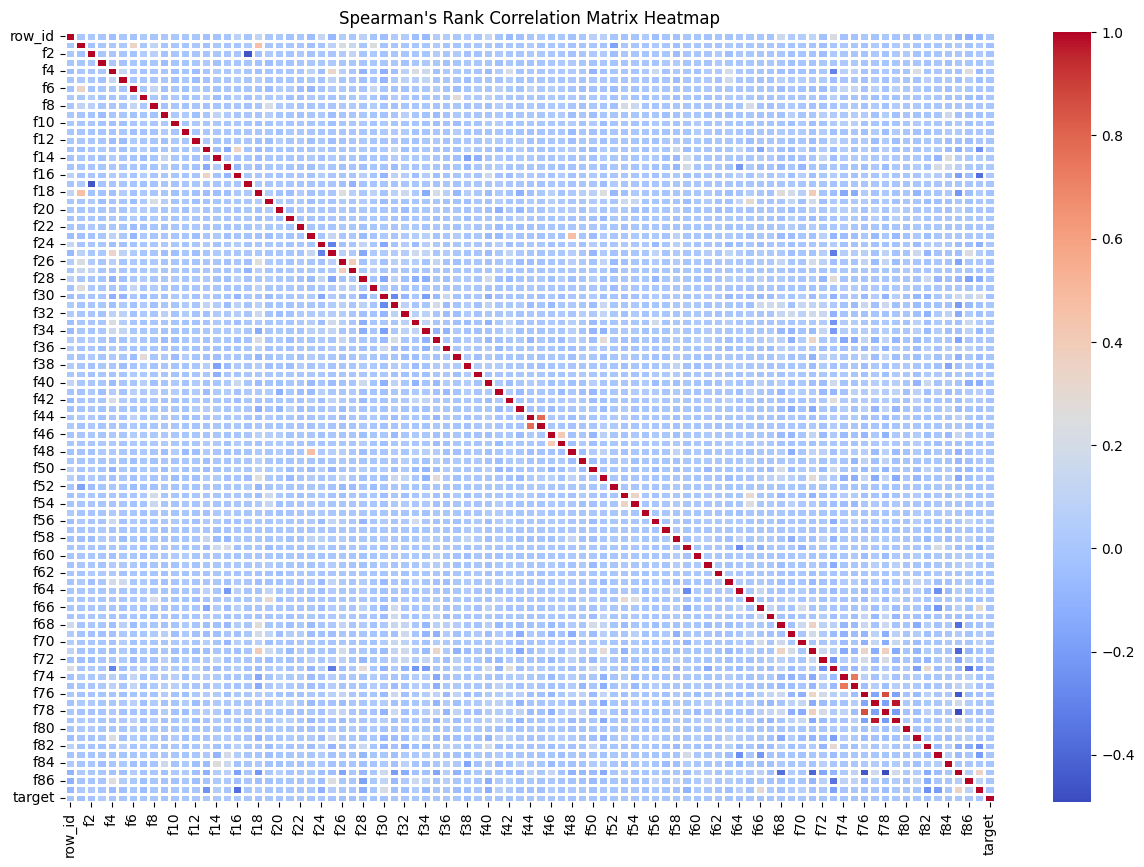

In [19]:
correlation_matrix = df_train.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

# Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=1)
plt.title("Spearman's Rank Correlation Matrix Heatmap")
plt.show()

In [24]:
# Find pairs of highly correlated features
highly_correlated_pairs = []

threshold = 0.6  # Define a threshold for "high" correlation

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
print("Highly correlated feature pairs (threshold > 0.6):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (threshold > 0.6):
f45 and f44: correlation = 0.78
f75 and f74: correlation = 0.74
f78 and f76: correlation = 0.86
f79 and f77: correlation = 0.97


In [26]:
# Find pairs of highly correlated features
highly_correlated_pairs = []

threshold = -0.2 # Define a threshold for "high" correlation

for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if (correlation_matrix.iloc[i, j]) < threshold:
            highly_correlated_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
print("Highly correlated feature pairs (threshold > 0.6):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (threshold > 0.6):
f17 and f2: correlation = -0.46
f25 and f24: correlation = -0.30
f31 and f30: correlation = -0.27
f64 and f15: correlation = -0.21
f64 and f59: correlation = -0.27
f73 and f4: correlation = -0.30
f73 and f25: correlation = -0.32
f73 and f33: correlation = -0.23
f73 and f34: correlation = -0.21
f73 and f72: correlation = -0.23
f79 and f78: correlation = -0.20
f83 and f64: correlation = -0.25
f83 and f66: correlation = -0.22
f85 and f18: correlation = -0.22
f85 and f68: correlation = -0.37
f85 and f71: correlation = -0.40
f85 and f76: correlation = -0.45
f85 and f78: correlation = -0.49
f86 and f73: correlation = -0.35
f87 and f13: correlation = -0.24
f87 and f16: correlation = -0.37
f87 and f82: correlation = -0.24


In [29]:
def get_top_correlated_features(corr_matrix, top_n=5):
    # Create a dictionary to store the top correlated features
    top_corr_dict = {}

    # Iterate over each feature in the correlation matrix
    for col in corr_matrix.columns:
        # Exclude self-correlation (correlation of the feature with itself)
        top_corr = corr_matrix[col].drop(labels=[col])

        # Sort by absolute correlation value and get top N correlated features
        top_corr_features = top_corr.abs().sort_values(ascending=False).head(top_n)

        # Store the results in the dictionary
        top_corr_dict[col] = top_corr_features

    return top_corr_dict

In [31]:
# Get the top 5 correlated features for each feature in the dataset
top_correlated_features = get_top_correlated_features(correlation_matrix, top_n=5)

# Display the top correlated features for each feature
for feature, correlations in top_correlated_features.items():
    print(f"Feature: {feature}")
    print(correlations)
    print("-" * 50)

Feature: row_id
f73                   0.23
f68                   0.16
f24                   0.13
f40                   0.12
f18                   0.11
Name: row_id, dtype: float64
--------------------------------------------------
Feature: f1
f18                   0.47
f6                    0.34
f29                   0.26
f26                   0.22
f52                   0.17
Name: f1, dtype: float64
--------------------------------------------------
Feature: f2
f17                   0.46
f27                   0.11
f8                    0.08
f72                   0.05
f58                   0.04
Name: f2, dtype: float64
--------------------------------------------------
Feature: f3
f9                       0.04
f19                      0.04
target                   0.04
f58                      0.03
f41                      0.03
Name: f3, dtype: float64
--------------------------------------------------
Feature: f4
f25                   0.33
f73                   0.30
f86                